In [1]:
!pip install bangla_stemmer
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.2 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=9f8028b68cb5cbb52bee4832fa00292677aa028e9122c964fc6f1ea5c0b62264
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bnlp import NLTKTokenizer
from bs4 import BeautifulSoup
from bnlp import BengaliCorpus as corpus
import re
from bangla_stemmer.stemmer import stemmer

In [3]:
df_train = pd.read_excel("/kaggle/input/ubmec-dataset/UBMEC.xlsx")

In [4]:
df_train.head()

,text,classes
0,এই নাটকটি হচ্ছে ১৯৯৩ সালের। কিন্তু তখন ইউটিউব ...,joy
1,২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ত...,surprise
2,"বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক ""কোথাও কেউ...",joy
3,"এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সালে...",joy
4,কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দে...,surprise


In [5]:
df_train.dropna(inplace=True)

In [6]:
df_train['text'] = df_train['text'].astype(str)

In [7]:
longest_string = max(df_train["text"], key=len)
print(len(longest_string))

3648


In [8]:
df_train['classes'].value_counts()

classes
joy         3467
sadness     2683
anger       2480
disgust     2079
surprise    1366
fear        1361
Name: count, dtype: int64

In [9]:
# Instantiate the NLTKTokenizer
bnltk = NLTKTokenizer()


def remove_stopwords(text):
    # Get the list of Bengali stopwords
    bengali_stopwords = corpus.stopwords
    
    # Tokenize the Bengali text using NLTKTokenizer
    word_tokens = bnltk.word_tokenize(text)
    
    # Remove stopwords
    filtered_tokens = [token for token in word_tokens if token not in bengali_stopwords]
    
    # Join the filtered tokens back into a text
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text


In [10]:
df_train['text'] = df_train['text'].apply(remove_stopwords)

In [11]:
longest_string = max(df_train["text"], key=len)
print(len(longest_string))

3355


In [12]:
df_train['text'] 

0        নাটকটি ১৯৯৩ সালের । ইউটিউব ছিলোনা । ইউটিউব আবি...
1            ২০২১ সালে “ কোথাও ” আসে - রুচির প্রশংসা পারছি
2        বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক `` কোথাও '...
3        এতো সুন্দর নাটক কখনো নাই,2021 সালে দেখলাম 👌 কয়...
4        কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দে...
                               ...                        
13431       Bravo বললে ছোট ৷ হাজারো সালাম আজকের Hero কে...
13432    ম্যাজিস্ট্রেট স্যার ? প্রথমটুক পড়ে ভাবছি বেচার...
13433    আপনারা সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদের ...
13434              এগিয়ে । আপনাদের দিকেই তাকিয়ে বাংলাদেশ ।
13435         দুর্নীতি মুক্ত নিশ্চয় চোরও মুক্ত , বিশ্বাস !
Name: text, Length: 13436, dtype: object

In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_train, test_size=0.2,stratify=df_train['classes'],random_state=42)

In [14]:
X_train  =  train_df['text'].values.tolist()
y_train = train_df['classes'].tolist()

In [15]:
X_test =  test_df['text'].values.tolist()
y_test = test_df['classes'].tolist()

In [16]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 64.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 38.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 11.8 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=25dfd252d0dff98dac3f3361e3121588971330540bdc9dd4533fcc5c87d61df4
  Stored in directory: /roo

In [17]:
import ktrain
from ktrain import text
MODEL_NAME = 'bert-base-multilingual-uncased'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

In [18]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 14
	95percentile : 31
	99percentile : 61


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 14
	95percentile : 33
	99percentile : 64


In [19]:
print(trn)

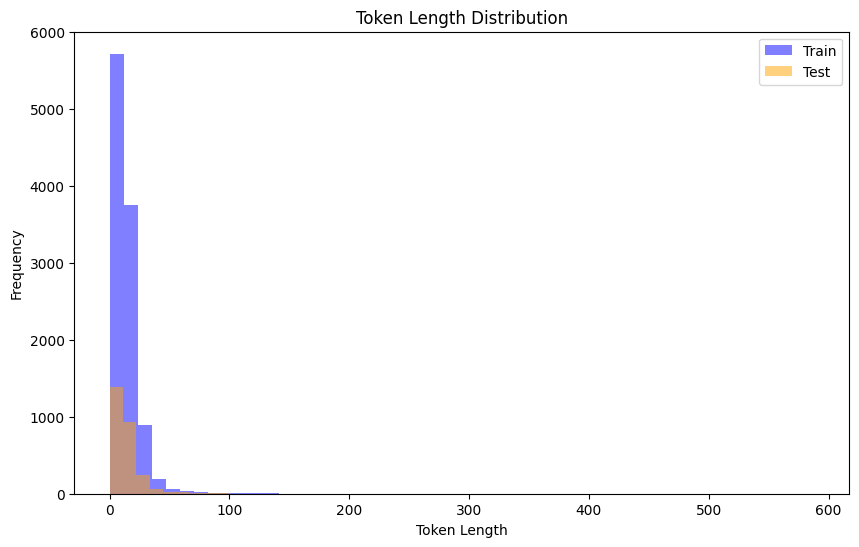

In [20]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [21]:
model = t.get_classifier()

In [22]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [23]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [24]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1344/1344 [==============================] - 856s 618ms/step - loss: 1.6063 - accuracy: 0.3427 - val_loss: 1.4043 - val_accuracy: 0.4483
Epoch 2/10
1344/1344 [==============================] - 825s 614ms/step - loss: 1.3371 - accuracy: 0.4860 - val_loss: 1.2914 - val_accuracy: 0.5026
Epoch 3/10
1344/1344 [==============================] - 825s 614ms/step - loss: 1.1694 - accuracy: 0.5599 - val_loss: 1.2603 - val_accuracy: 0.5186
Epoch 4/10
1344/1344 [==============================] - 825s 614ms/step - loss: 1.0373 - accuracy: 0.6132 - val_loss: 1.3065 - val_accuracy: 0.5160
Epoch 5/10
1344/1344 [==============================] - 825s 614ms/step - loss: 0.9110 - accuracy: 0.6708 - val_loss: 1.3523 - val_accuracy: 0.5205
Epoch 6/10
1344/1344 [==============================] - 825s 614ms/step - loss: 0.7548 - accuracy: 0.7246 - val_loss: 1.4178 - val_accuracy: 0.5357
Epoch 7/10
1344/1344 [===========================

In [25]:
# Save the trained model
learner.save_model('/kaggle/output/model.zip')

In [26]:
classes=t.get_classes()

In [27]:
cm = learner.validate(class_names=t.get_classes())

84/84 [==============================] - 60s 676ms/step
              precision    recall  f1-score   support

       anger       0.52      0.55      0.53       496
     disgust       0.36      0.34      0.35       416
        fear       0.63      0.57      0.60       272
         joy       0.70      0.70      0.70       694
     sadness       0.45      0.47      0.46       537
    surprise       0.44      0.41      0.42       273

    accuracy                           0.53      2688
   macro avg       0.51      0.51      0.51      2688
weighted avg       0.53      0.53      0.53      2688



In [28]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [29]:
!zip -r mental.zip /kaggle/output/model

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/model

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/model)


In [30]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


__notebook__.ipynb


In [31]:
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/mental-health-rand.zip')

In [32]:
# df_cm = pd.DataFrame(cm, index=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "],
#                      columns=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "])
# plt.figure(figsize = (10,7))
# sns.heatmap(df_cm,annot=True, fmt ="d")